# Lab 3: Simulation
In this lab, you will learn how to create, run and interpret simulations using R. Simulation is widely used in cases where estimates are required from complex distributions of values or a hierarchy of distributions. 
In this lab you will estimate the range of expected profitability for a lemonade stand. The profitability of the lemonade stand depends on the number of customers arriving, the profit from the drinks they order, and the tips the customer may or may not choose to leave. The distribution of possible profits is thus, the joint distribution of customer arrivals, items ordered, and tips. In practice, such a complex distribution cannot be analyzed except using simulation.

## Exercise 1: Computing Random Variables
R offers comprehensive support for computing random variables from probability distributions. There is support in R for a large number of namedÃÂ distributions; e.g. Normal, Poisson, Beta. Additionally, you can define your own functions to compute specialized probability distributions. In this exercise, you will compute and evaluate named probability distributions using Python.

In this procedure, you will compute a random set of values representing the number of customer arrivals per day at the lemonade stand. This calculation assumes that the mean number of arrivals per day is 600, with a standard deviation of 30. In practice, these parameters would be known from past history.

### Create Functions to Compute and Plot Distribution Statistics
Run the code in the cell below to create functions to plot a histogram for a specified distribution and return summary statistics for the distribution. The **comp.ci** function computes the two-sided empirical confidence intervals or quantiles for the input values. The **dist.summary** function plots a histogram and returns summary statistics for the input values. 

In [5]:
comp.ci <- function(vec, quantile = 0.05){
  ## Compute the upper and lower emperical quantiles
  lower <- quantile/2.0
  upper <- 1.0 - lower
  c(quantile(vec, probs = lower, na.rm = TRUE),
    quantile(vec, probs = upper, na.rm = TRUE))
}

dist.summary <- function(dist, name, num.bins = 120){
  ## function to plot and print a summary
  ## of the distribution  
  maxm <- max(dist)
  minm <- min(dist)
  bw <- (maxm - minm)/num.bins
  breaks <- seq(minm - bw/2, maxm + bw/2, by = bw)
  hist(dist, col = 'blue', breaks = breaks, xlab = name,
       main = paste('Distribution of ', name))
  
  std <- round(sd(dist), digits = 2)
  print(paste('Summary of', name, '; with std = ', std))
  print(summary(dist))
} 

### Simulate Customers Using a Normal Distribution
Run the code below to create a function that uses the R **rnorm** function to generate random values drawn from a Normal distribution. A summary of the generated values along with confidence intervals are then computed. The default values of mean = 600 and standard deviation = 30 correspond to the distribution of expected arrivals of customers at the lemonade stand.

In [6]:
sim.normal <- function(num, mean = 600, sd = 30){
  ## Simulate from a Normal distribution
  dist = rnorm(num, mean, sd)
  titl = paste('Normal: ', as.character(num), ' values')
  dist.summary(dist, titl)     
  print('Empirical 95% CIs')
  print(comp.ci(dist))
  NULL
}

Run the cell below to call the **sim.normal** function for 100, 1,000, 10,000, and 100,000 values.

[1] "Summary of Normal:  100  values ; with std =  30.34"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  528.6   573.0   597.2   597.5   620.6   672.1 
[1] "Empirical 95% CIs"
    2.5%    97.5% 
540.9253 651.9608 


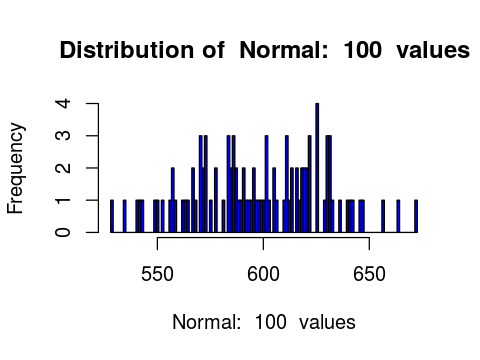

[1] "Summary of Normal:  1000  values ; with std =  30.29"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  506.8   577.5   598.8   598.5   619.9   705.4 
[1] "Empirical 95% CIs"
    2.5%    97.5% 
540.7127 661.7904 


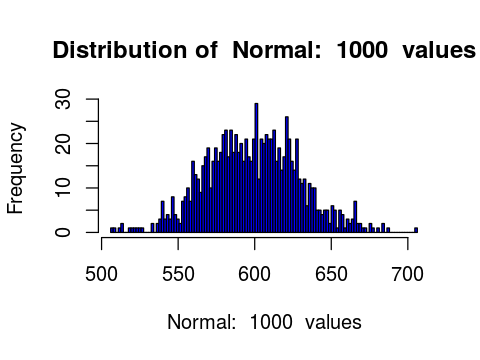

[1] "Summary of Normal:  10000  values ; with std =  29.98"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  480.8   580.1   600.7   600.3   620.2   704.8 
[1] "Empirical 95% CIs"
    2.5%    97.5% 
540.9170 659.2505 


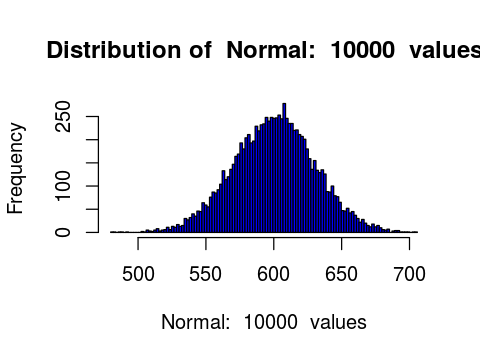

[1] "Summary of Normal:  1e+05  values ; with std =  30.01"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  464.7   579.9   600.2   600.2   620.5   723.0 
[1] "Empirical 95% CIs"
    2.5%    97.5% 
541.3693 658.9304 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

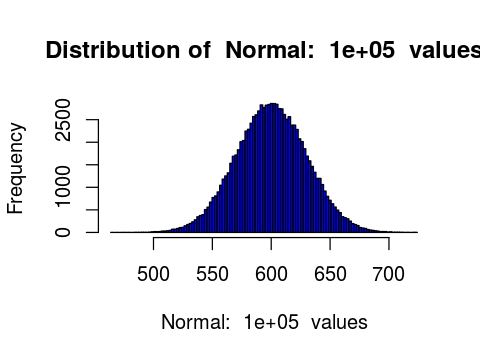

In [7]:
nums <- c(100, 1000, 10000, 100000)
lapply(nums, sim.normal)

### Simulate Customers Using a Poisson Distribution
Run the code below to create a function that simulates customer arrivals using a Poisson distribution. The operation of this code is nearly identical to the **sim.normal** function you previously used. The **rpois** function has been substituted for the **rnorm** function. 

In [8]:
sim.poisson <- function(num, mean = 600){
  ## Simulate from a Poisson distribution
  dist = rpois(num, mean)
  titl = paste('Poisson: ', as.character(num), ' values')
  dist.summary(dist, titl)    
  print('Empirical 95% CIs')
  print(comp.ci(dist))
  NULL
}

Run the cell below to call the **sim_normal** function for 100,000 values.

[1] "Summary of Poisson:  1e+05  values ; with std =  24.44"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    497     583     600     600     616     707 
[1] "Empirical 95% CIs"
 2.5% 97.5% 
  553   648 


NULL

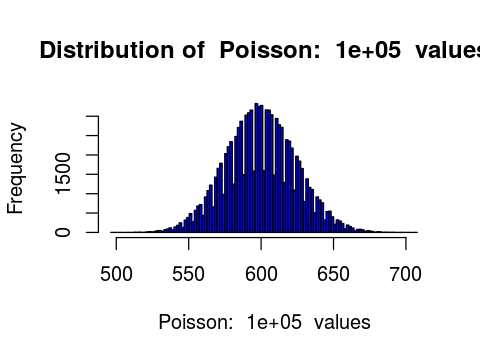

In [9]:
sim.poisson(100000)

Examine these results for the Poisson distribution, and compare them to those for the Normal distribution. Note the following:
- The mean and median (shown here as the 50% quantile) are at the theoretical values for the Normal distribution.
- The 95% two-sided confidence intervals differ only slightly from those for the Normal distribution. 
- The values generated from a Poisson distribution are integers, which are reflected in the integer values for all the summary statistics. Further, this property leads to the uneven binning seen in the histogram.
- Despite the uneven binning, the general shape of the histogram is nearly identical to that for the Normal distribution. 
- Overall it is safe to conclude that for the large value of the mean for the number of customer arrivals there is no substantial difference between the Normal and Poisson distributions. 

## Exercise 2: Computing Specialized Random Variables
In the preceding exercise you computed random values from the Normal and Poisson distributions. There are many practical cases where a specialized distribution of values is needed. For the lemonade stand model, the profitability per order and the tip amount per customer visit are not standard distributions. In this case, you will use an R function to compute these distributions. For the lemonade stand, assume that per order is 5 for 30% of customer visits, 3.5 for another 30% of customer visits, and 4 for the remaining 40% of visits. Assume that the tip is 0 for 50% of customer visits, 0.25 for 20% of visits, 1 for 20% of visits, and 2 for the remaining 10% of visits. 

### Compute a Distribution for Profits
Run the code below to create a function t compute a distributin for profits. This function using the R **runif** function to generate draws from a uniform distribution. Based on the values of the random draws, the profit is computed using the nested **ifelse** functions.

In [10]:
profits <- function(num){
  ## Generates the profit from the uniform distribution
  unif <- runif(num)
  ifelse(unif < 0.3, 5,
         ifelse(unif < 0.6, 3.5, 4))
}

Run the code below to call the **profits** function with 100000 values and plot the resulting distribution.

[1] "Summary of profits ; with std =  0.59"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.500   3.500   4.000   4.151   5.000   5.000 


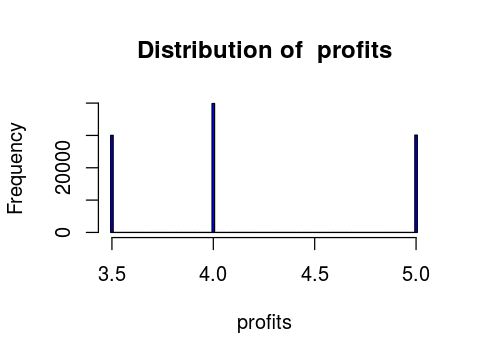

In [11]:
prfts <- profits(100000)
dist.summary(prfts, 'profits')

Note: You can see that the distribution of profits per customer visit is as expected by looking at the frequencies of each profit value. Further, the median value is the most frequent profit level of 4.0

### Compute a Distribution for Tips
Run the code below to create a function t compute a distributin for tips. This function is nearly identical to the **profits** function, except that there are two levels of nesting of the **ifelse** statements in the list comprehension.

In [12]:
tips <- function(num){
  ## Generates the tips from the uniform distribution
  unif <- runif(num)
  ifelse(unif < 0.5, 0,
         ifelse(unif < 0.7, 0.25, 
                ifelse(unif < 0.9, 1, 2)))
}

Run the code below to call the **tips** function with 100000 values and plot the resulting distribution.

[1] "Summary of tips ; with std =  0.64"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4498  1.0000  2.0000 


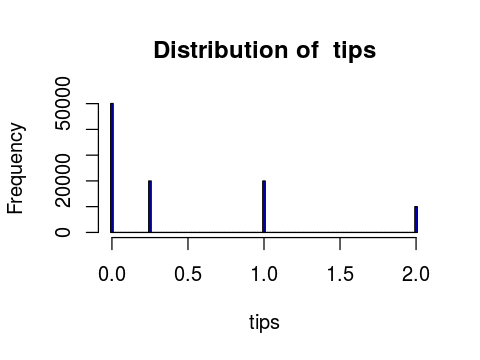

In [13]:
tps <- tips(100000)
dist.summary(tps, 'tips')


Note: The distribution of tip values is as expected indicating the **tips** function operates correctly.

## Exercise 3: Simulating Lemonade Stand Income
In this exercise you will use Python to compute the distribution of total net daily income for the lemonade stand based on the number of visits, profit per sale, and tips. To compute total net income requires pulling together the pieces from the previous exercises and combining these results to form an overall model of lemonade stand income.

**Note**: The model represented by the code in this exercise makes some assumptions concerning independence of several of the random variables.
- The amount chanrged for lemondade is based on the weather. This means that the net profit per visit and the number of visits per day are independent. Therefore the profits on a given day can be represented by:
$$Profits_i = \Sigma_i p(arrivals_i)\ p(price_i) \\
where \\
Profits_i = net profits\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
price_i = price\ of\ lemondade\ per\ day$$  

- We will also assume that all customers on the same day leave the same tip.  This means that the tip per visit and the number of visits per day are independent. Therefore the tips on a given day can be represented by:
$$Tips_i = \Sigma_i p(arrivals_i)\ p(tip_i) \\
where \\
Tips_i = Tips\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
tip_i = tip\ for\ ith\ day$$  

- We assume that profit per cup of lemondae is independent of tip left by the customer on each day. The frequency distribution of daily net income is modeled as: 

$$P(net) = P(profit) + P(tips) \\
where P(net) = probability\ distribution\ of\ net\ income\\ 
p(profit) = distribution of daily profit, \\
p(tips) = distribution of daily tip$$ 

### Create a Function to Simulate Lemonade Stand Income
Run the code below to create a function that computes customer arrivals, profit per customer, profit per day, tips per customer, tips per day, and total daily income. Depending on the value of the pois argument, customer arrivals can be simulated from either a Normal or Poisson distribution.

In [14]:
sim.lemonade <- function(num, mean = 600, sd = 30, pois = FALSE){
  ## Simulate the profits and tips for
  ## a lemonade stand.
  
  ## number of customer arrivals
  if(pois){
    arrivals <- rpois(num, mean)
  } else {
   arrivals <- rnorm(num, mean, sd) 
  }
  dist.summary(arrivals, 'customer arrivals per day')
  
  ## Compute distibution of average profit per arrival
  proft <- profits(num) 
  dist.summary(proft, 'profit per arrival')
  
  ## Total profits are profit per arrival 
  ## times number of arrivals.
  total.profit <- arrivals * proft 
  dist.summary(total.profit, 'total profit per day')
  
  ## Compute distribution of average tips per arrival
  tps <- tips(num) 
  dist.summary(tps, 'tips per arrival')
  
  ## Compute average tips per day
  total.tips <- arrivals * tps
  dist.summary(total.tips, 'total tips per day')
  
  ## Compute total profits plus total tips and normalize.
  total.take <- total.profit + total.tips
  dist.summary(total.take, 'total net per day')
}


Run the code below to run the simulation for 100,000 values, using the default mean and standard deviation

[1] "Summary of customer arrivals per day ; with std =  30.04"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  469.6   579.8   600.1   600.1   620.3   740.5 


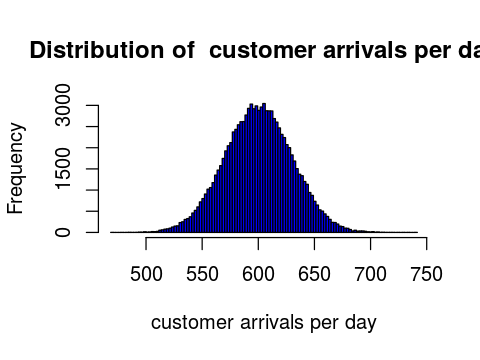

[1] "Summary of profit per arrival ; with std =  0.6"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.500   3.500   4.000   4.155   5.000   5.000 


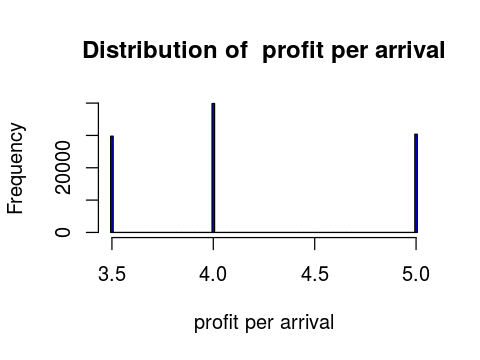

[1] "Summary of total profit per day ; with std =  378.07"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1644    2187    2404    2493    2861    3641 


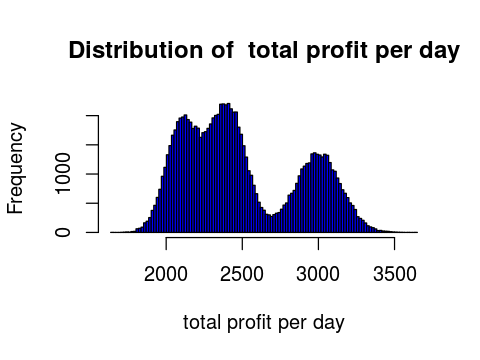

[1] "Summary of tips per arrival ; with std =  0.64"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4531  1.0000  2.0000 


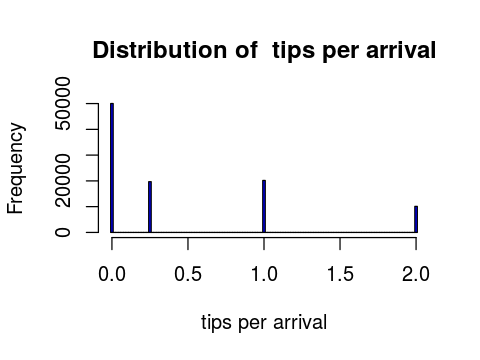

[1] "Summary of total tips per day ; with std =  386.54"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0     272     581    1432 


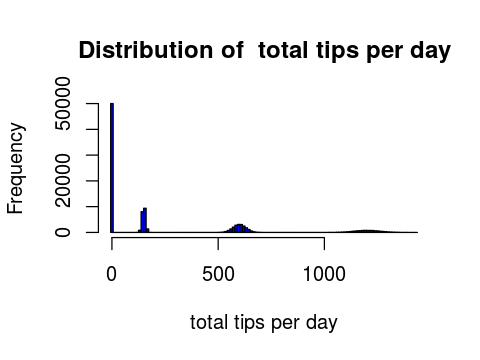

[1] "Summary of total net per day ; with std =  545.58"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1644    2328    2674    2765    3107    4880 


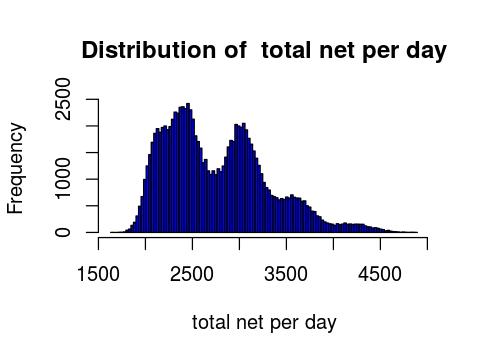

In [15]:
sim.lemonade(100000)

Examine each of the plots and the corresponding summary statistics. Note the following:
- The Normal distribution of the customer arrivals is as expected with a mean and median of 600. 
- The distribution of profits per arrival appears as was observed previously.
- The distribution of total profits per day, is the vector product of arrivals per day and profits per arrival. Note, that this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of tips per arrival appears as was observed previously.
- The distribution of total tips per day is the vector product of arrivals per day and tips per arrival. Again, this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of the final total net profit per day is the sum of the distribution of total profits per day and the distribution of total tips per day. This final distribution is quite complex with five peaks. 

**Questions for evaluation**

Re-run the simulation of the lemonade stand for 100,000 values with the expected number of customer arrivals per day increased to 1200 and a standard deviation of 40. Answer the following questions

1. How many distinct peaks are visible. 
3. Is the dispersion of total net profit greater or less than for the first simulation. 


[1] "Summary of customer arrivals per day ; with std =  40.01"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1019    1173    1200    1200    1227    1366 


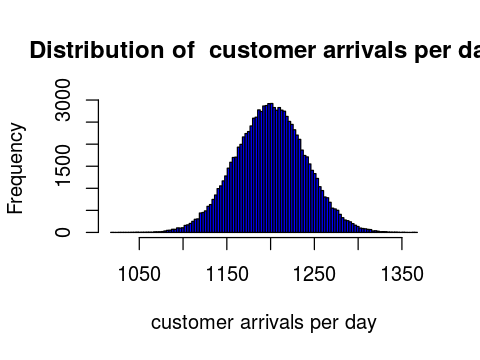

[1] "Summary of profit per arrival ; with std =  0.6"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.500   3.500   4.000   4.151   5.000   5.000 


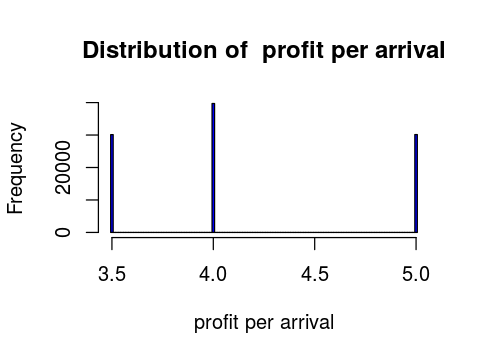

[1] "Summary of total profit per day ; with std =  733.43"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3597    4331    4800    4981    5810    6759 


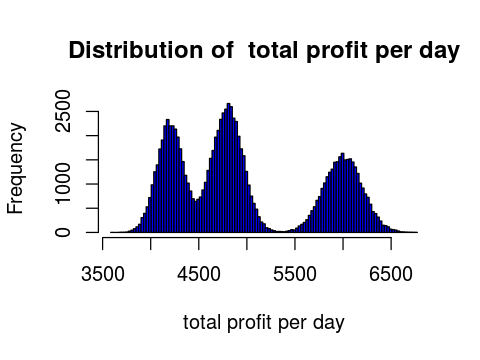

[1] "Summary of tips per arrival ; with std =  0.64"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4499  1.0000  2.0000 


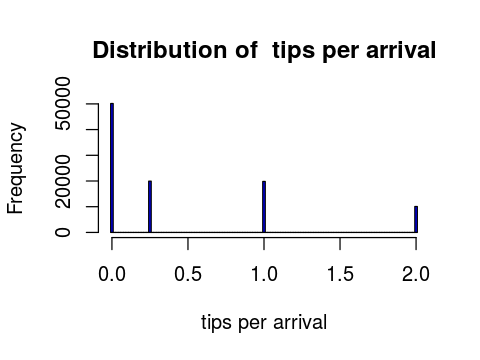

[1] "Summary of total tips per day ; with std =  771.17"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   540.1  1173.0  2696.0 


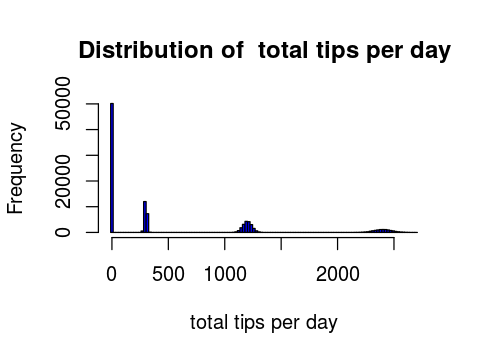

[1] "Summary of total net per day ; with std =  1065.58"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3667    4678    5316    5521    6170    9436 


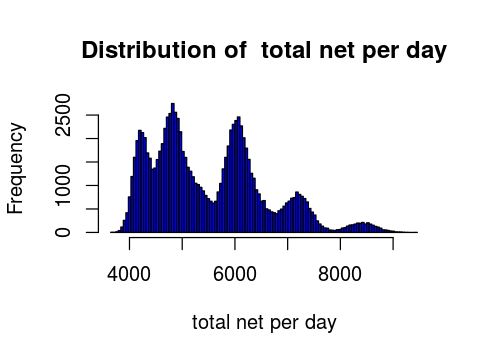

In [16]:
sim.lemonade(100000, 1200, 40)
